# TP1 : Loi de Zipf et Modèles de Langage à base de Chaînes de Markov
Le but de ce TP est d'apprendre à manipuler des corpus de texte en considérant le texte comme un signal correspondant à des séquences de lettres. <br>
Vous réaliserez 2 types d'études, l'une sur les liens entre taille de corpus et taille de lexique, en vérifiant si vos données vérifient la loi statistique de Zipf sur la distribution des mots dans le langage ; l'autre sur l'application de modèles de signal sur des signaux discrets tels que les chaînes de Markov avec une application à la classification thématique de texte.

Vous trouverez sur ce lien [`TP1_data.tgz`](https://pageperso.lis-lab.fr/frederic.bechet/M1_TAL/TP1_data.tgz) les ressources suivantes :
- **corpus_topic** (*2.9 Mo*) : répertoire contenant des corpus de dépêches de presse en mode plain text en français, classées selon 4 thématiques (Culture, Economie, International, Sport)
- **frwiki-sample.txt.gz** (*56 Mo*) : extrait du dump (ancien) de Wikipedia pour le français en mode plain text
- **orfeo_dump.txt.gz** (*20 Mo*) : corpus de transcription de conversations orales au format plain text

Ces corpus représentent différents types de langage :
- par rapport au niveau de langue, langue **orale** transcrite dans le corpus orfeo et langue **écrite** dans les autres corpus
- par rapport au domaine, corpus **journalistiques** pour les textes de corpus_topic et texte **encyclopédique** pour les corpus provenant de Wikipedia
- par rapport au **thème** dans les différentes dépêches de presse du corpus corpus_topic.

Le premier traitement que vous ferez sur ces corpus est une étape de "**tokenization**" c'est à dire de découpage du flux de texte d'un corpus en une séquence de tokens.<br>
Vous utiliserez le programme `tokenize.py` qui permet d'effectuer une tokenization par rapport à un lexique en utilisant l'algorithme glouton de la recherche de la séquence de longueur maximale dans un arbre en partie commune représentant le lexique. Cet algorithme est particulièrement efficace car il permet d'avoir une complexité linéaire par rapport à la taille du corpus à traiter. Vous utiliserez le lexique `lexique_code.txt` qui comprend 89365 mots représentés par des paires code mot. La sortie du programme de tokenization est la séquence de code correspondant aux mots du texte à traiter. Les mots inconnus du lexique reçoivent le code 0. Dans tous les exercices qui suivent, ce sont les corpus tokenizés qui seront utilisés.

## Partie 1 : Loi de Zipf

### Question 1
Déterminer la relation qui lie la taille d'un corpus et la taille de son lexique (ensemble des mots différents le composant). Pour cela vous allez écrire une fonction qui va afficher la taille du lexique lorsque l'on garde uniquement les n premiers mots du corpus, pour les valeurs de n suivantes : 100 500 1000 1500 2000 4000 5000 10000 20000 30000 40000 50000 80000 100000 200000 500000 1000000 2000000 5000000. Par exemple vous allez obtenir: 
```
100 63
500 201
1000 323
1500 406
2000 488
4000 737
5000 863
10000 1426
20000 2279
30000 2965
40000 3641
50000 4261
80000 5647
100000 6316
200000 9248
500000 16157
1000000 26516
2000000 39908
5000000 60182
```

In [23]:
import re

def lire_corpus(fichier):
   
    try:
        with open(fichier, "r", encoding="utf-8") as f:
            texte = f.read().lower() 
            return re.findall(r'\b\w+\b', texte)  
    except FileNotFoundError:
        print(f"Erreur : Le fichier '{fichier}' n'existe pas.")
        return []

def calculer_taille_lexique(fichier, n):
    
    corpus = lire_corpus(fichier)
    if not corpus:
        return 0 

    premier_mots = corpus[:n]
    lexique_reduit = set(premier_mots)
    return len(lexique_reduit)

def taille(fichier_corpus):
    tailles_lexique = []
    for n in[100, 500, 1000, 1500, 2000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 80000, 100000, 200000, 500000, 1000000, 2000000, 5000000]:
        taille = calculer_taille_lexique(fichier_corpus, n)
        tailles_lexique.append(taille)
        print(f"Taille du lexique avec {n} mots : {taille}")
    return tailles_lexique

### Question 2
Vous allez maintenant comparez les distributions taille corpus/taille lexique obtenues sur les 2 corpus `frwiki-sample.txt` et `orfeo_dump.txt` en les affichant avec la commande Unix `gnuplot` ou directement dans ce notebook. 
<br>Cette commande permet de produire une courbe à partir d'un ou plusieurs fichiers de valeurs. Par exemple, si votre distribution sur le fichier frwiki-sample.txt s'appelle wiki.data et celle sur le fichier orfeo_dump.txt, orfeo.data, vous pourrez produire une courbe avec la commande suivante (après avoir lancé l'interpréteur gnuplot) : <br>
```bash
set grid ; set logscale x ; set logscale y ; set xlabel 'taille corpus' ; set ylabel 'taille lexique' ; plot 'wiki.data' w lp t 'ecrit' , 'orfeo.data' w lp t 'oral'set grid ; set logscale x ; set logscale y ; set xlabel 'taille corpus' ; set ylabel 'taille lexique' ; plot 'wiki.data' w lp t 'ecrit' , 'orfeo.data' w lp t 'oral'
```

Si vous voulez écrire la courbe dans un fichier, il suffit de rajouter :
```bash
set terminal pdf ; set output 'taille_lexique.pdf' ; replot
```

Pour les afficher dans ce notebook, vous pouvez utiliser une bibliothèque de visualisation telle que Matplotlib ou Plotly.

Taille du lexique avec 100 mots : 56
Taille du lexique avec 500 mots : 204
Taille du lexique avec 1000 mots : 377
Taille du lexique avec 1500 mots : 525
Taille du lexique avec 2000 mots : 619
Taille du lexique avec 4000 mots : 1007
Taille du lexique avec 5000 mots : 1198
Taille du lexique avec 10000 mots : 2145
Taille du lexique avec 20000 mots : 3575
Taille du lexique avec 30000 mots : 4752
Taille du lexique avec 40000 mots : 5691
Taille du lexique avec 50000 mots : 6354
Taille du lexique avec 80000 mots : 8842
Taille du lexique avec 100000 mots : 10122
Taille du lexique avec 200000 mots : 15703
Taille du lexique avec 500000 mots : 25133
Taille du lexique avec 1000000 mots : 34561
Taille du lexique avec 2000000 mots : 45258
Taille du lexique avec 5000000 mots : 62243


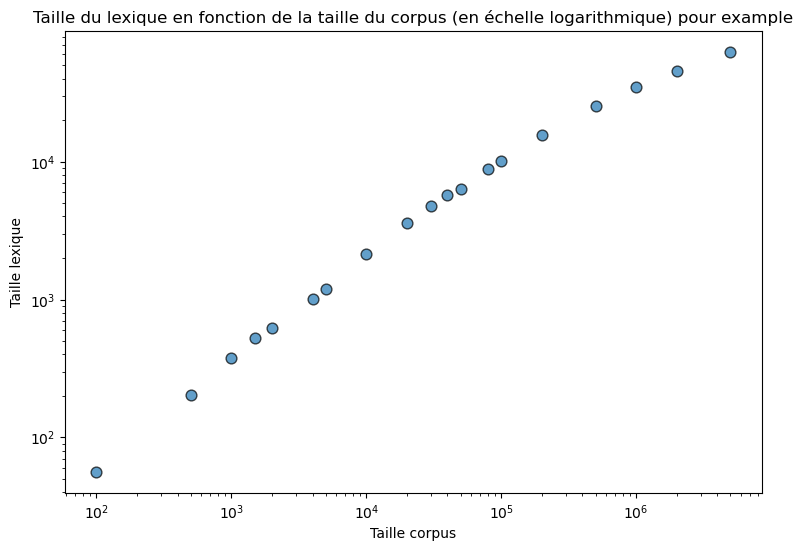

In [25]:
import matplotlib.pyplot as plt

def plot_log_data(x, y, corpus_name):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

    ax.set_title(
        f"Taille du lexique en fonction de la taille du corpus (en échelle logarithmique) pour {corpus_name}"
    )

    ax.set_xlabel("Taille corpus")
    ax.set_ylabel("Taille lexique")

    ax.set_xscale("log")
    ax.set_yscale("log")
    



x = [100, 500, 1000, 1500, 2000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 80000, 100000, 200000, 500000, 1000000, 2000000, 5000000]
y = taille('/amuhome/e23025302/Téléchargements/TP1_data/data/frwiki-sample.txt.tok')

plot_log_data(x,y,"example")

Taille du lexique avec 100 mots : 61
Taille du lexique avec 500 mots : 199
Taille du lexique avec 1000 mots : 317
Taille du lexique avec 1500 mots : 395
Taille du lexique avec 2000 mots : 467
Taille du lexique avec 4000 mots : 689
Taille du lexique avec 5000 mots : 800
Taille du lexique avec 10000 mots : 1318
Taille du lexique avec 20000 mots : 2090
Taille du lexique avec 30000 mots : 2693
Taille du lexique avec 40000 mots : 3218
Taille du lexique avec 50000 mots : 3762
Taille du lexique avec 80000 mots : 4927
Taille du lexique avec 100000 mots : 5564
Taille du lexique avec 200000 mots : 7792
Taille du lexique avec 500000 mots : 12736
Taille du lexique avec 1000000 mots : 20653
Taille du lexique avec 2000000 mots : 28987
Taille du lexique avec 5000000 mots : 40814


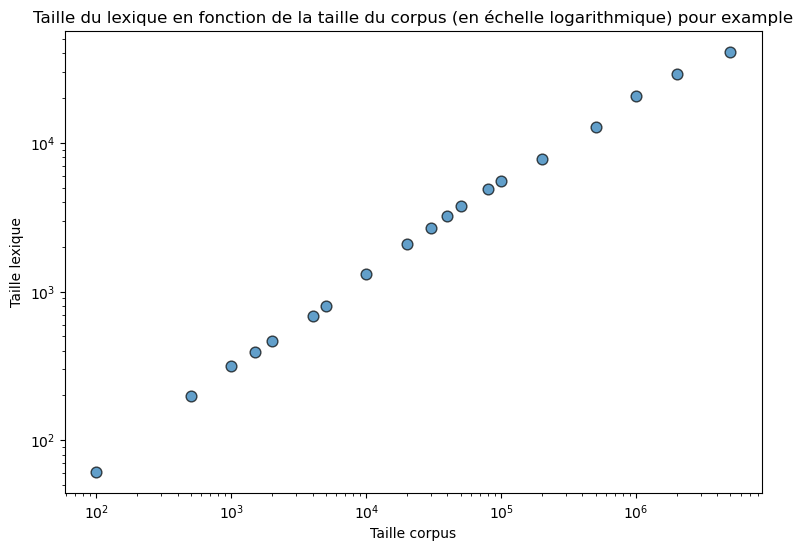

In [26]:
z= taille('/amuhome/e23025302/Téléchargements/TP1_data/data/orfeo_dump.txt.tok')
plot_log_data(x,z,"example")

### Question 3
Que déduisez vous des courbes précédentes, tout d'abord concernant le rapport qui lit taille de corpus et taille de lexique, puis sur les caractéristiques de la langue orale par rapport à la langue écrite ?

Le rapport entre le corpus et la taille est proportionnel, ce qui signifie que plus la taille augmente, plus le corpus augmente de manière significative

pour des tailles de corpus assez grandes exemple 500000 mots , la langue écrite représente un lexique plus riche que la langue orale car tout simplement la langue écrite est plus variée, elle intègre plus de termes techniques, littéraires et spécifiques à différents domaines alors que la langue orale est plus redondante, avec un usage fréquent d’un petit ensemble de mots communs et des tournures répétitives. ( pour 5000000 , la langue orale : 40814 , la langue écrite : 62243)

## Partie 2 : Loi de Zipf et comparaison de corpus
Dans cette partie vous allez produire des courbes afin de vérifier si vos données respectent ou pas la loi de Zipf. Pour cela vous allez produire, pour un lexique donné, un fichier contenant sur chaque ligne les mots classés par fréquence décroissante, le nombre d'occurence et le rang du mot (selon l'ordre de ces fréquences). Enfin vous produirez des courbes rang/fréquence en utilisant gnuplot en affichant les courbes correspondant à plusieurs corpus pour pouvoir les comparer.

Graphique sauvegardé dans 'comparaison_courbes_loglog.png'


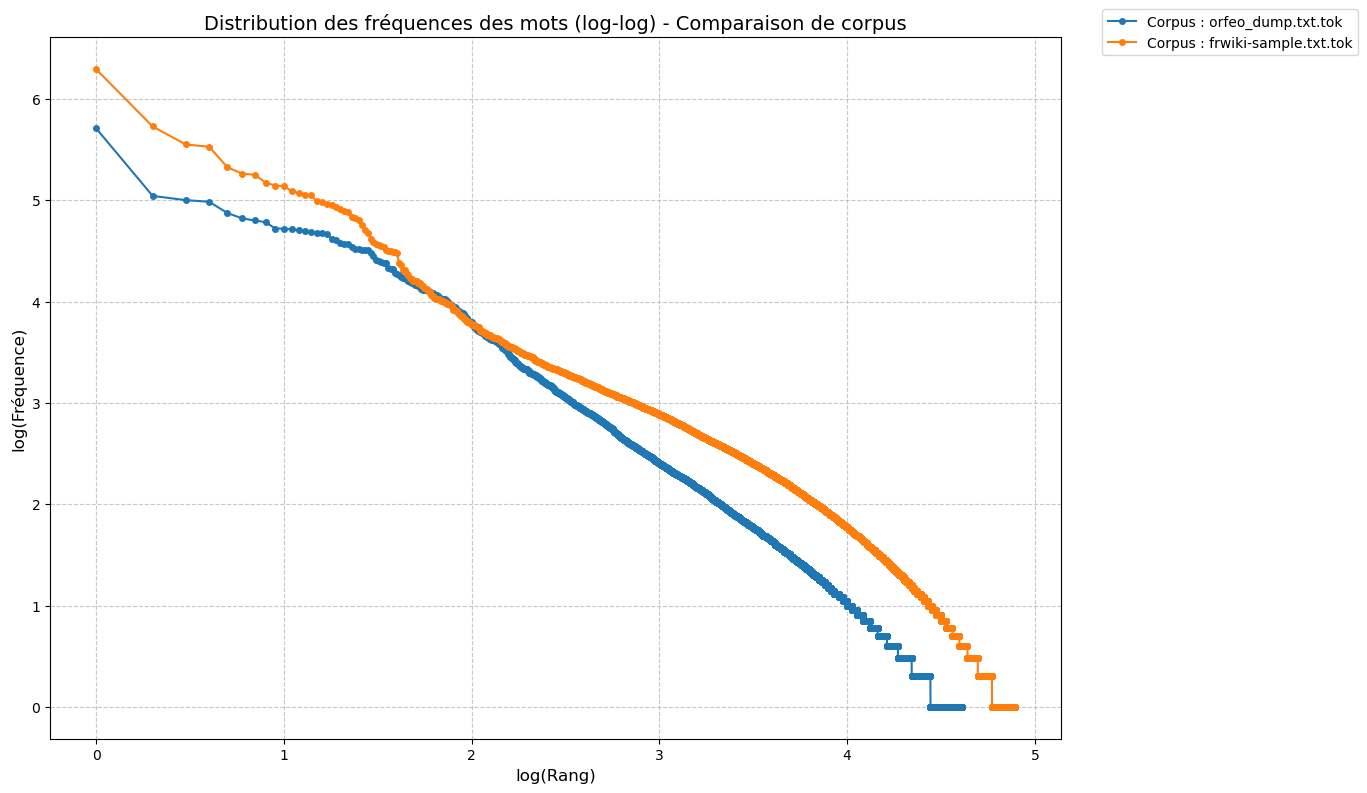

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os

def analyser_frequence_mots(fichier):
    """
    Analyse la fréquence des mots dans un corpus et retourne un classement.
    Vérifie l'existence du fichier et gère les cas d'erreur.
    """
    if not os.path.exists(fichier):
        print(f"Erreur : Le fichier '{fichier}' n'existe pas.")
        return []

    try:
        with open(fichier, "r", encoding="utf-8") as f:
            corpus = f.read().split()
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier : {e}")
        return []

    frequence = {}
    for mot in corpus:
        mot = mot.lower()  # Ignorer la casse
        frequence[mot] = frequence.get(mot, 0) + 1

    # Tri par fréquence décroissante
    mots_tries = sorted(frequence.items(), key=lambda x: (-x[1], x[0]))
    
    # Ajout du rang (1-based)
    classement = [(rang + 1, mot, occurrence) for rang, (mot, occurrence) in enumerate(mots_tries)]
    
    return classement

def sauvegarder_classement(fichier_sortie, classement):
    """
    Sauvegarde le classement dans un fichier texte avec gestion des erreurs.
    """
    try:
        with open(fichier_sortie, "w", encoding="utf-8") as f:
            for rang, mot, occurrence in classement:
                f.write(f"{rang}\t{mot}\t{occurrence}\n")
        print(f"Classement sauvegardé avec succès dans '{fichier_sortie}'")
    except Exception as e:
        print(f"Erreur lors de la sauvegarde : {e}")

def generer_classement(fichier_texte, fichier_sortie):
    """
    Génère et sauvegarde le classement d'un fichier avec vérification.
    """
    classement = analyser_frequence_mots(fichier_texte)
    if not classement:
        print(f"Aucun classement généré pour '{fichier_texte}'")
        return
    sauvegarder_classement(fichier_sortie, classement)

def generer_courbe(fichiers_textes, fichier_sortie_png="comparaison_courbes_loglog.png", log_base=10):
    """
    Génère un graphique log-log superposé pour plusieurs fichiers.
    - log_base : 10 pour base 10, e pour base naturelle (default 10)
    """
    plt.figure(figsize=(14, 8))
    plt.title("Distribution des fréquences des mots (log-log) - Comparaison de corpus", fontsize=14)
    plt.xlabel("log(Rang)", fontsize=12)
    plt.ylabel("log(Fréquence)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Dictionnaire de couleurs pour éviter les doublons
    colors = plt.cm.tab10.colors
    
    for idx, fichier in enumerate(fichiers_textes):
        classement = analyser_frequence_mots(fichier)
        if not classement:
            continue  # Ignorer les fichiers invalides
        
        # Extraire les données
        rangs = [rang for rang, _, _ in classement]
        frequences = [occurrence for _, _, occurrence in classement]
        
        if log_base == 10:
            rangs_log = np.log10(rangs)
            frequences_log = np.log10(frequences)
        else:
            rangs_log = np.log(rangs)
            frequences_log = np.log(frequences)
        
        nom_fichier = os.path.basename(fichier)
        
        plt.plot(
            rangs_log,
            frequences_log,
            marker='o',
            linestyle='-',
            markersize=4,
            color=colors[idx % len(colors)],
            label=f"Corpus : {nom_fichier}"
        )
    
    plt.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1.3, 1.05))
    plt.tight_layout()
    
    try:
        plt.savefig(fichier_sortie_png, dpi=300, bbox_inches='tight')
        print(f"Graphique sauvegardé dans '{fichier_sortie_png}'")
    except Exception as e:
        print(f"Erreur lors de la sauvegarde du graphique : {e}")
    
    plt.show()

if __name__ == "__main__":
    """generer_classement(
        "/amuhome/e23025302/Téléchargements/TP1_data/data/orfeo_dump.txt.tok",
        "/amuhome/e23025302/Téléchargements/TP1_data/data/orpheo_classement_mots.txt"
    )
    
    generer_classement(
        "/amuhome/e23025302/Téléchargements/TP1_data/data/frwiki-sample.txt.tok",
        "/amuhome/e23025302/Téléchargements/TP1_data/data/wiki_classement_mots.txt"
    )"""

    # base 10
    fichiers = [
        "/amuhome/e23025302/Téléchargements/TP1_data/data/orfeo_dump.txt.tok",
        "/amuhome/e23025302/Téléchargements/TP1_data/data/frwiki-sample.txt.tok"
    ]
    
    generer_courbe(fichiers, "comparaison_courbes_loglog.png", log_base=10)

### Question 1
Comparez les courbes correspondant aux corpus Wikipedia et Orfeo précédents. Qu'en déduisez vous ?

Les résultats montrent que les tokens avec un rang inférieur ont une fréquence plus élevée, et inversement, ce qui illustre la loi de Zipf. Cette loi stipule que la fréquence des mots est inversement proportionnelle à leur rang. Ainsi, dans le corpus Wikipedia (langue écrite), une petite proportion de tokens très fréquents domine, respectant la loi de Zipf. En comparaison, la langue orale pourrait présenter une distribution différente, mais la langue écrite suit bien cette loi avec une forte concentration de mots fréquents au début du classement.









### Question 2
Comparez les courbes correspondant aux différents thèmes des corpus du répertoire corpus_topic. Qu'en déduisez vous ?

Graphique sauvegardé dans 'comparaison_courbes_corpus_loglog.png'


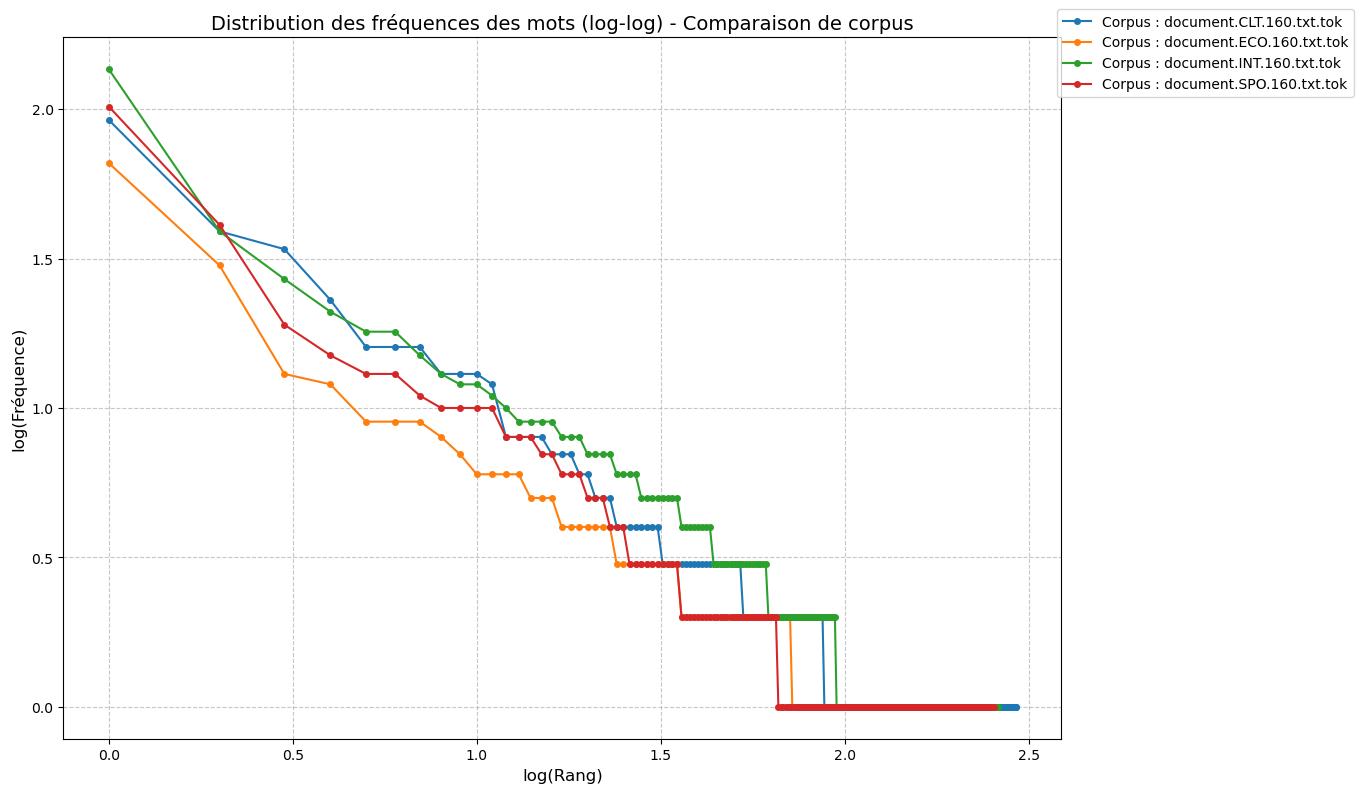

In [28]:
fichiers = [
        "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/CLT/test/document.CLT.160.txt.tok",
        "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/ECO/test/document.ECO.160.txt.tok",
        "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/INT/test/document.INT.160.txt.tok",
        "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/SPO/test/document.SPO.160.txt.tok"   
    ]
    
generer_courbe(fichiers, "comparaison_courbes_corpus_loglog.png", log_base=10)

## Partie 3 : Chaînes de Markov pour la classification thématique

Nous allons maintenant modéliser le signal correspondant à un corpus de texte en utilisant une méthode basée sur les **Chaînes de Markov** vues en cours. <br>
Pour chaque corpus, nous allons modéliser sa source sous la forme d'un modèle de langage de type **bigramme** ou **2g**. Pour cela, nous devons calculer les probabilités de toutes les séquences de deux mots $(W_1, W_2)$ dans le corpus, exprimées sous la forme $P(W_2 \mid W_1)$.<br>
Ce terme est estimé sur le corpus par le critère du maximum de vraisemblance avec la formule : 

$$
P(W_2 \mid W_1) = \frac{|W_1, W_2|}{|W_1|}
$$

où $|W_1, W_2|$ est le nombre de bigrammes composés des mots $W_1$ et $W_2$, et $|W_1|$ est le nombre d'unigrammes de $W_1$. 

Pour un corpus donné $C_t$ contenant des textes appartenant au thème $t$, nous allons calculer l'ensemble des probabilités de tous les bigrammes du corpus. Cela constituera notre modèle de Markov de type bigramme pour le thème $t$, que nous noterons $M_{2g}(t)$.


### Question 1
Écrivez une fonction qui prend en entrée un corpus $C_t$ et qui calcule les probabilités de tous les bigrammes du corpus en choisissant une structure de données permettant un accès efficace aux données. Ces probabilités correspondent au modèle bigramme $M_{2g}(t)$, vous devrez les stocker dans un fichier JSON qui constituera votre modèle. 

Vous apprendrez un modèle pour chaque thème des corpus `corpus_topic` uniquement sur les fichiers contenus dans le répertoire `train` de chaque thème. Vous aurez donc les 4 modèles suivants : 

- $M_{2g}(\text{CLT})$
- $M_{2g}(\text{ECO})$
- $M_{2g}(\text{INT})$
- $M_{2g}(\text{SPO})$

In [8]:
import os
import json
from collections import defaultdict, Counter

def load_corpus(directory):
   
    corpus = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                for line in f:
                    tokens = line.strip().split()
                    if tokens:  # Ignorer les lignes vides
                        corpus.append(tokens)
    return corpus

def build_bigram_model(tokenized_corpus):
    unigram_counts = Counter()
    bigram_counts = defaultdict(Counter)

    for document in tokenized_corpus:
        for i in range(len(document) - 1):
            w1 = document[i]
            w2 = document[i + 1]
            unigram_counts[w1] += 1
            bigram_counts[w1][w2] += 1

    # Calculer les probabilités conditionnelles
    model = defaultdict(dict)
    for w1 in bigram_counts:
        total = unigram_counts[w1]
        for w2, count in bigram_counts[w1].items():
            model[w1][w2] = count / total

    return model



def json_save(model, output_path):
   
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(model, f, ensure_ascii=False, indent=4)
    print(f"sauvegardé dans {output_path}")
    with open(output_path, "r", encoding="utf-8") as f:
        json_content = json.load(f)
        print("10 premiers bigrammes du fichier :")
        count = 0
        for w1, w2_probs in json_content.items():
            for w2, prob in w2_probs.items():
                print(f"P({w2} | {w1}) = {prob:.4f}")
                count += 1
                if count >= 10:
                    return


def process_all_topics(root_dir):
   
    topics = ["CLT", "ECO", "INT", "SPO"]
    for topic in topics:
        train_dir = os.path.join(root_dir, topic, "train")
        if not os.path.exists(train_dir):
            print(f"Attention : Le répertoire '{train_dir}' n'existe pas.")
            continue
       
        corpus = load_corpus(train_dir)
        if not corpus:
            print(f"Aucun fichier trouvé pour le thème '{topic}'.")
            continue
       
        model = build_bigram_model(corpus)
       
        output_file = f"M2g_{topic}.json"
        json_save(model, output_file)


if __name__ == "__main__":
    corpus_root_dir = "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic" 
   
    process_all_topics(corpus_root_dir)




sauvegardé dans M2g_CLT.json
10 premiers bigrammes du fichier :
P((Espagne), | FIGUERAS) = 1.0000
P(2 | (Espagne),) = 0.6667
P(8 | (Espagne),) = 0.3333
P(fév | 2) = 0.1667
P(pour | 2) = 0.0556
P(n'a | 2) = 0.0556
P(de | 2) = 0.0556
P(a | 2) = 0.0556
P(est | 2) = 0.0556
P(mars | 2) = 0.0556
sauvegardé dans M2g_ECO.json
10 premiers bigrammes du fichier :
P(14 | LONDRES,) = 0.0714
P(8 | LONDRES,) = 0.1429
P(19 | LONDRES,) = 0.1429
P(9 | LONDRES,) = 0.2143
P(12 | LONDRES,) = 0.1429
P(6 | LONDRES,) = 0.0714
P(7 | LONDRES,) = 0.0714
P(13 | LONDRES,) = 0.0714
P(15 | LONDRES,) = 0.0714
P(jan | 14) = 0.5909
sauvegardé dans M2g_INT.json
10 premiers bigrammes du fichier :
P((Cisjordanie), | NAPLOUSE) = 0.8333
P((Cisjordanie) | NAPLOUSE) = 0.1667
P(3 | (Cisjordanie),) = 0.8333
P(1er | (Cisjordanie),) = 0.1667
P(jan | 3) = 0.9333
P(juil: | 3) = 0.0222
P(janvier | 3) = 0.0222
P(km", | 3) = 0.0222
P((AFP) | jan) = 1.0000
P(- | (AFP)) = 1.0000
sauvegardé dans M2g_SPO.json
10 premiers bigrammes du fich

Interprétation et analyse du résultat : comme déjà indiqué , un bigramme est une paire de mots qui apparaissent ensemble dans un texte avec une certaine probabilité. Dans ces fichiers, chaque bigramme est affiché avec une probabilité conditionnelle , par exemple Par exemple, dans le thème CLT, on a P((Espagne), | FIGUERAS) = 1.0000 , Cela signifie que chaque fois que le mot "FIGUERAS" apparaît, il est suivi de "(Espagne)," avec une probabilité de 100%. 

#### Analyse par thème : Les thèmes sont bien différenciés grâce aux bigrammes, car chaque catégorie a des termes spécifiques.
#### exemple des les 10 premiers bigrammes : 
    CLT : Indices que les textes concernent des événements culturels ou historiques en Espagne.
    ECO : Indices que les textes concernent des événements économiques ou financiers liés à Londres.
    INT : Indices que les textes concernent des articles sur les conflits et la géopolitique.
    SPO : Indices que les textes concernent des résultats de matchs ou des événements sportifs internationaux .


#### En général Les thèmes sont bien différenciés grâce aux bigrammes, car chaque catégorie a des termes spécifiques. Le modèle bigramme semble efficace pour classer les textes en fonction de leur vocabulaire et de leurs structures linguistiques. Toutefois, des erreurs peuvent apparaître si plusieurs thèmes utilisent des termes similaires (ex : un article sur l'économie du sport pourrait être mal classé entre ECO et SPO).


### Question 2
Vous allez écrire une fonction qui prend en entrée un modèle $M_{2g}(t)$ au format JSON et un corpus de texte tokénisé $C$, et qui calculera la quantité $-LP(M_{2g}(t), C)$. Cette quantité correspond à la somme des logs des probabilités de tous les bigrammes de mots de $C$ par le modèle $M_{2g}(t)$ (voir le cours pour plus de détails). Si un bigramme de $C$ n'est pas présent dans le modèle, il est ignoré.

In [7]:
import json
import math
import os

def charger_modele_json(chemin_modele):
    with open(chemin_modele, 'r', encoding='utf-8') as f:
        return json.load(f)

def charger_corpus_fichier(chemin_corpus):
    corpus = []
    with open(chemin_corpus, 'r', encoding='utf-8') as f:
        for ligne in f:
            tokens = ligne.strip().split()
            if tokens:  
                corpus.append(tokens)
    return corpus

def calculer_somme_log_probabilites(chemin_modele, chemin_corpus):
    
    model = charger_modele_json(chemin_modele)
    corpus = charger_corpus_fichier(chemin_corpus)
    
    somme = 0
    
    for document in corpus:
        for i in range(len(document) - 1):
            mot1 = document[i]
            mot2 = document[i+1]
            
            if mot1 in model and mot2 in model[mot1]:
                probabilite = model[mot1][mot2]
                somme += math.log(probabilite)
    
    return somme

if __name__ == "__main__":
    modele_path = "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/CLT/test/M2g_CLT.json"      
    corpus_path = "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/CLT/train/document.CLT.57.txt.tok"     
    
    if not os.path.exists(modele_path):
        print(f"Erreur : Le modèle '{modele_path}' n'existe pas.")
    elif not os.path.exists(corpus_path):
        print(f"Erreur : Le corpus '{corpus_path}' n'existe pas.")
    else:
        resultat = calculer_somme_log_probabilites(modele_path, corpus_path)
        print(f"Résultat : {resultat:.4f}")

Résultat : 0.0000


### Question 3
Vous allez maintenant utiliser le programme de la question précédente pour déterminer automatiquement le thème des corpus des répertoires `test` des corpus `corpus_topic`. Pour chaque fichier test $C$, vous calculerez les 4 quantités suivantes : 

- $-LP(M_{2g}(\text{CLT}), C)$  
- $-LP(M_{2g}(\text{ECO}), C)$  
- $-LP(M_{2g}(\text{INT}), C)$  
- $-LP(M_{2g}(\text{SPO}), C)$  

Le modèle $M_{2g}(t)$ qui donne la valeur $-LP$ la plus petite est celui qui génère le corpus $C$ avec la plus grande probabilité, et donc on attribue au corpus $C$ le thème $t$.

In [6]:
import json
import math
import os

base_dir = "/amuhome/e23025302/Téléchargements/TP1_data/data/corpus_topic/"
themes = ["CLT", "ECO", "INT", "SPO"]

def determiner_theme_fichier(chemin_fichier):

    corpus = charger_corpus_fichier(chemin_fichier)
    scores = {}

    for theme in themes:
        modele_path = os.path.join(base_dir, theme, "test", f"M2g_{theme}.json")

        if os.path.exists(modele_path):
            modele = charger_modele_json(modele_path)
            score = calculer_somme_log_probabilites(modele, corpus)
            scores[theme] = score
        else:
            print(f"Modèle JSON introuvable : {modele_path}")

    if scores:
        meilleur_theme = min(scores, key=scores.get)  # Trouver la plus petite valeur
        print(f"{os.path.basename(chemin_fichier)} : {meilleur_theme} ({scores[meilleur_theme]:.4f})")

def classifier_tous_les_fichiers():

    for theme in themes:
        test_dir = os.path.join(base_dir, theme, "test")

        if os.path.exists(test_dir):
            print({theme})

            for fichier in os.listdir(test_dir):
                chemin_fichier = os.path.join(test_dir, fichier)

                if os.path.isfile(chemin_fichier) and fichier.endswith(".txt"):
                    determiner_theme_fichier(chemin_fichier)
        else:
            print(f"Le dossier test pour {theme} n'existe pas.")

if __name__ == "__main__":
    classifier_tous_les_fichiers()


{'CLT'}
document.CLT.171.txt : CLT (-180.5157)
document.CLT.165.txt : ECO (-637.4587)
document.CLT.168.txt : CLT (-488.7878)
document.CLT.170.txt : ECO (-529.0857)
document.CLT.177.txt : CLT (-373.2419)
document.CLT.173.txt : CLT (-675.8225)
document.CLT.174.txt : CLT (-618.6922)
document.CLT.164.txt : ECO (-637.4587)
document.CLT.161.txt : ECO (-378.1455)
document.CLT.167.txt : INT (-427.1805)
document.CLT.179.txt : INT (-672.3202)
document.CLT.172.txt : CLT (-275.8885)
document.CLT.160.txt : CLT (-560.1267)
document.CLT.175.txt : CLT (-612.1471)
document.CLT.166.txt : CLT (-499.7868)
document.CLT.178.txt : CLT (-450.4706)
document.CLT.176.txt : CLT (-222.2911)
document.CLT.162.txt : CLT (-602.3296)
document.CLT.169.txt : CLT (-488.7878)
document.CLT.163.txt : CLT (-376.8353)
{'ECO'}
document.ECO.162.txt : ECO (-572.2368)
document.ECO.170.txt : ECO (-766.5315)
document.ECO.172.txt : ECO (-752.5234)
document.ECO.177.txt : ECO (-820.7436)
document.ECO.178.txt : ECO (-671.9039)
document.

Analyse et interprétion : 
pour chaque theme : 

Pour la majorité des fichiers du thème CLT, le modèle prédit CLT, mais il y a des exceptions où le modèle prédit d'autres thèmes comme ECO, INT, ou SPO. Ces résultats suggèrent qu'il existe des similitudes dans les bigrammes des documents CLT avec d'autres thèmes. Par exemple, des documents comme document.CLT.165.txt ont été classés comme ECO, ce qui pourrait signifier que certains mots ou combinaisons de mots dans le document sont plus représentatifs des bigrammes du thème ECO.

De même, pour le thème ECO, le modèle prédit majoritairement ECO, mais aussi quelques fois SPO ou INT. Cela montre que certains documents partagent des similarités lexicales avec des thèmes voisins, et peut-être que le vocabulaire spécifique à chaque thème n'est pas toujours distinct.

Pour INT, les résultats montrent que le modèle a tendance à classer ces documents comme étant du thème INT, mais quelques cas, comme document.INT.170.txt, sont classés dans un autre thème, ici ECO. Cela pourrait indiquer que les documents INT ont des éléments de vocabulaire ou des structures qui sont aussi présents dans d'autres thèmes.


Pour SPO, il y a un mélange de bonnes classifications et de classifications incorrectes (par exemple, document.SPO.172.txt classé comme CLT). Cela suggère que le modèle n'est pas toujours capable de bien distinguer entre SPO et d'autres thèmes.

#### En géneral : Bonne précision globale , Le modèle semble généralement prédire le bon thème pour chaque fichier, avec une majorité de documents correctement classés dans leur thème principal. mais, quelques erreurs existent, qui pourrait être généralement dû à la similitude entre les documents du thème en question et d'autres thèmes 

### Question 4
Grâce aux programmes précédents, vous allez pouvoir mesurer le taux de bonne classification en thème de nos modèles bigrammes. Pour cela, pour chaque thème, vous allez mesurer combien de fichiers correspondant à la partition de `test` sont correctement labellisés. Donnez les scores de classification pour chaque thème. Qu'en déduisez-vous ? Expliquez les résultats obtenus.

In [5]:
def classifier_fichier(chemin_fichier):
    corpus = charger_corpus_fichier(chemin_fichier)
    scores = {}

    for theme in themes:
        modele_path = os.path.join(base_dir, theme, "test", f"M2g_{theme}.json")

        if os.path.exists(modele_path):
            modele = charger_modele_json(modele_path)
            score = calculer_somme_log_probabilites(modele, corpus)
            scores[theme] = score
        else:
            print(f"Modèle JSON introuvable : {modele_path}")

    if scores:
        return min(scores, key=scores.get)  
    return None

def evaluer_classification():

    resultats = {theme: {"correct": 0, "total": 0} for theme in themes}

    for theme in themes:
        test_dir = os.path.join(base_dir, theme, "test")

        if os.path.exists(test_dir):

            for fichier in os.listdir(test_dir):
                chemin_fichier = os.path.join(test_dir, fichier)

                if os.path.isfile(chemin_fichier) and fichier.endswith(".txt"):
                    theme_prevu = classifier_fichier(chemin_fichier)

                    resultats[theme]["total"] += 1
                    if theme_prevu == theme:
                        resultats[theme]["correct"] += 1

    for theme, stats in resultats.items():
        if stats["total"] > 0:
            taux = (stats["correct"] / stats["total"]) * 100
            print(f"{theme} : {stats['correct']}/{stats['total']} corrects ({taux:.2f}%)")
        else:
            print(f"Aucun fichier test trouvé pour {theme}")

if __name__ == "__main__":
    evaluer_classification()

CLT : 14/20 corrects (70.00%)
ECO : 20/20 corrects (100.00%)
INT : 19/20 corrects (95.00%)
SPO : 19/20 corrects (95.00%)


#### Analyse et interpreation : Performance globalement solide : Le modèle fonctionne très bien pour tous les thèmes, avec des taux de précision de 70 % à 100 %. Les thèmes "ECO", "INT", et "SPO" ont montré des performances presque parfaites, ce qui suggère que les modèles sont bien adaptés à ces types de documents. Améliorations possibles : Le taux de 70 % pour le thème "CLT" montre qu'il y a encore des défis dans la classification de ce thème. Cela pourrait être dû à la similitude entre les documents de ce thème et ceux d'autres thèmes, ou à des problèmes dans la qualité du modèle pour "CLT"


### Question Bonus
Faites les mêmes expériences tout d'abord avec un modèle unigramme, puis un modèle trigramme (prédisant la probabilité d'un mot étant donné les 2 mots précédents). Qu'en déduisez-vous ?